Regression Model Evaluation:
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.00
R-squared (R2): 1.00
Classification Model Evaluation:
Accuracy: 0.96
Precision: 0.96
Recall: 0.98
F1 Score: 0.97


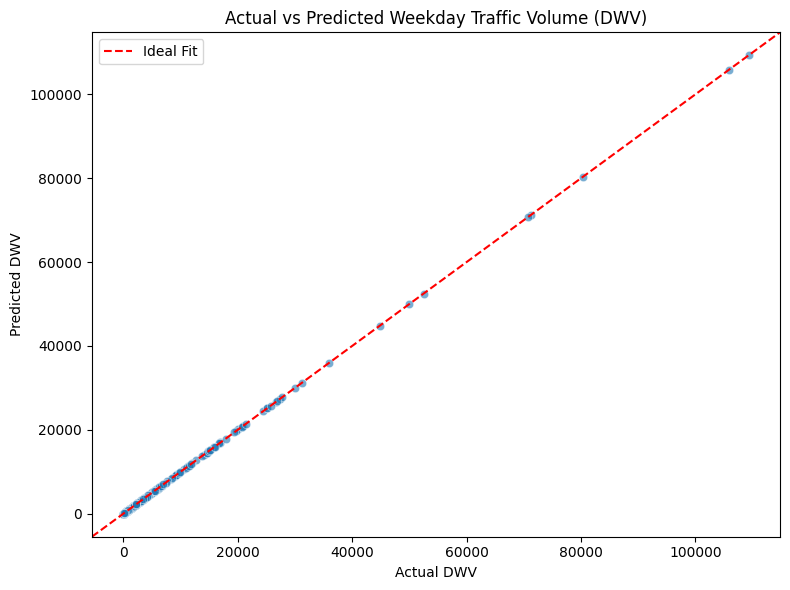

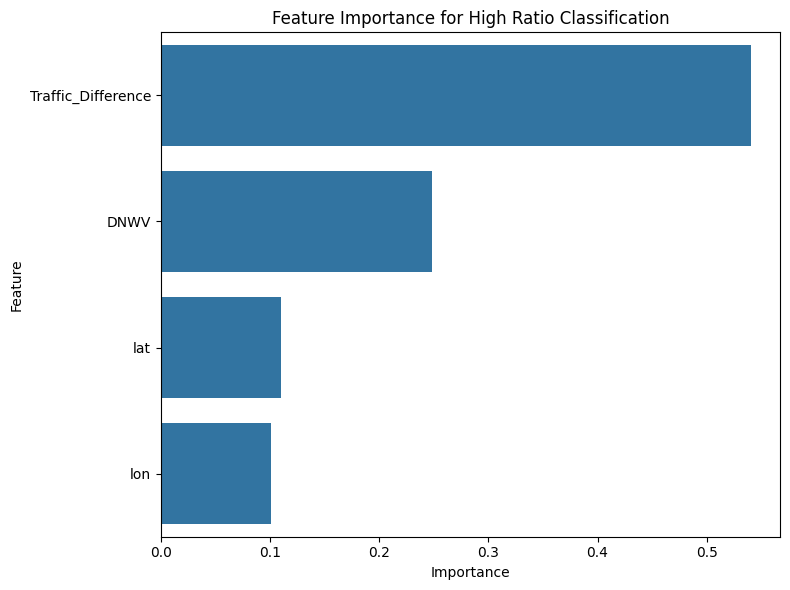

Key Insights from Evaluation:
1. Regression Metrics:
   - MSE and MAE quantify average prediction errors for DWV.
   - R-squared indicates how well the model explains weekday traffic volume.
2. Classification Metrics:
   - Accuracy: Overall correctness of the high ratio classification.
   - Precision: Focuses on true positives, relevant for high weekday traffic.
   - Recall: Measures sensitivity to identifying high traffic stations.
   - F1 Score balances precision and recall.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data_path = 'data_prepared.csv'  # Replace with your actual CSV path
data = pd.read_csv(data_path)

# Preprocess the data
# Convert relevant columns to numeric if needed
for col in ['DTV', 'DWV', 'DNWV', 'lon', 'lat']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with NaN values in relevant columns
data = data.dropna(subset=['DWV', 'DNWV', 'lon', 'lat'])

# Feature Engineering: Calculate DWV/DNWV ratio and traffic difference
data['DWV_DNWV_Ratio'] = data['DWV'] / data['DNWV']
data['Traffic_Difference'] = data['DWV'] - data['DNWV']

# Add a classification column: High weekday traffic ratio > 1.5
bins = [0, 1.5, np.inf]
labels = [0, 1]  # 0: Low ratio, 1: High ratio
data['High_Ratio_Class'] = pd.cut(data['DWV_DNWV_Ratio'], bins=bins, labels=labels).astype(int)

# Regression: Predict DWV based on DNWV and other features
X_reg = data[['DNWV', 'lon', 'lat', 'Traffic_Difference']]
y_reg = data['DWV']

# Split the dataset for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train a Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

# Make predictions and evaluate the regression model
y_pred_reg = reg_model.predict(X_test_reg)

# Regression Metrics
mse = mean_squared_error(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Classification: Predict High_Ratio_Class based on features
X_clf = data[['DNWV', 'lon', 'lat', 'Traffic_Difference']]
y_clf = data['High_Ratio_Class']

# Split the dataset for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf_model = RandomForestClassifier(random_state=42)
clf_model.fit(X_train_clf, y_train_clf)

# Make predictions and evaluate the classification model
y_pred_clf = clf_model.predict(X_test_clf)

# Classification Metrics
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf)
recall = recall_score(y_test_clf, y_pred_clf)
f1 = f1_score(y_test_clf, y_pred_clf)

print("Classification Model Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Visualize Actual vs Predicted DWV for Regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg, alpha=0.6)
plt.xlabel('Actual DWV')
plt.ylabel('Predicted DWV')
plt.title('Actual vs Predicted Weekday Traffic Volume (DWV)')
plt.axline((0, 0), slope=1, color='red', linestyle='--', linewidth=1.5, label='Ideal Fit')
plt.legend()
plt.tight_layout()
plt.show()

# Visualize Feature Importance for Classification
feature_importances = pd.DataFrame({'Feature': X_clf.columns, 'Importance': clf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance for High Ratio Classification')
plt.tight_layout()
plt.show()

# Key Observations
print("Key Insights from Evaluation:")
print("1. Regression Metrics:")
print(f"   - MSE and MAE quantify average prediction errors for DWV.")
print(f"   - R-squared indicates how well the model explains weekday traffic volume.")
print("2. Classification Metrics:")
print(f"   - Accuracy: Overall correctness of the high ratio classification.")
print(f"   - Precision: Focuses on true positives, relevant for high weekday traffic.")
print(f"   - Recall: Measures sensitivity to identifying high traffic stations.")
print(f"   - F1 Score balances precision and recall.")
